<a href="https://colab.research.google.com/github/kam00023/BUDA-535-FINAL/blob/main/Soccer1stAttempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soccer data with names removed and random #'s replaced as unique identifiers.

In [42]:
import pandas as pd
import numpy as np


In [35]:
import pip

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

In [39]:
import sklearn

In [116]:
df=pd.read_csv("https://raw.githubusercontent.com/kam1819/Soccer1-1/main/Soccer1stAttempt.csv")
print(df)

     UniqueID Field Time Bench Time  Player Load  Player Load / Min  \
0        2747       1:41       0:08    940.99829            9.24991   
1        2466       1:41       0:08    723.68042            7.11370   
2        1766       1:41       0:08    904.07373            8.88695   
3        2177       1:41       0:08   1115.22868           10.96258   
4        2087       1:41       0:08    830.18161            8.16060   
..        ...        ...        ...          ...                ...   
160      3830       0:01       0:00     38.05090           25.55466   
161      2115       0:01       0:00      0.91065            0.61159   
162      4194       0:01       0:00     38.21173           25.66268   
163      5000       0:01       0:00     38.77196           26.03893   
164      1837       0:01       0:00     39.30662           26.39800   

     Player Load / Metre  Max Hr  Min Hr    Mean Hr  Peak Player Load  
0              168.97054     188       0  162.38739           5.39905  
1  

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [94]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [117]:
df.shape

(165, 10)

In [118]:
df.head()

,UniqueID,Field Time,Bench Time,Player Load,Player Load / Min,Player Load / Metre,Max Hr,Min Hr,Mean Hr,Peak Player Load
0,2747,1:41,0:08,940.99829,9.24991,168.97054,188,0,162.38739,5.39905
1,2466,1:41,0:08,723.68042,7.11370,0.00000,179,0,148.64881,5.62609
2,1766,1:41,0:08,904.07373,8.88695,0.00000,197,0,144.82728,5.89006
3,2177,1:41,0:08,1115.22868,10.96258,705.84097,196,104,164.30783,4.24087
4,2087,1:41,0:08,830.18161,8.16060,99.39908,197,0,157.98411,5.28454


In [119]:
df.describe()

,UniqueID,Player Load,Player Load / Min,Player Load / Metre,Max Hr,Min Hr,Mean Hr,Peak Player Load
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,2562.618182,233.426086,10.807822,269.106323,153.406061,51.769697,131.453128,4.529752
std,1417.473725,279.554528,6.093639,2000.607157,67.093482,59.774028,57.305290,1.301243
min,114.000000,0.910650,0.611590,0.000000,0.000000,0.000000,0.000000,0.189860
25%,1438.000000,50.928700,6.980940,0.000000,154.000000,0.000000,127.161510,3.782510
50%,2425.000000,152.744130,9.184680,0.000000,179.000000,0.000000,155.105150,4.775700
75%,3879.000000,231.557500,12.875700,0.000000,190.000000,118.000000,165.060840,5.354830
max,5001.000000,1205.741040,30.948800,22566.279130,238.000000,162.000000,189.545950,7.316210


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

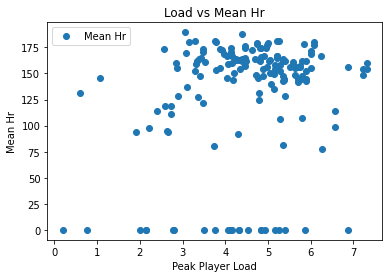

In [120]:
df.plot(x='Peak Player Load', y='Mean Hr', style='o')
plt.title('Load vs Mean Hr')
plt.xlabel('Peak Player Load')
plt.ylabel('Mean Hr')
plt.show()

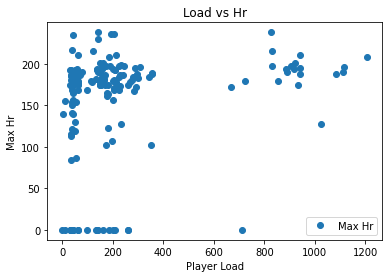

In [121]:
df.plot(x='Player Load', y='Max Hr', style='o')
plt.title('Load vs Hr')
plt.xlabel('Player Load')
plt.ylabel('Max Hr')
plt.show()

In [151]:
X = df['Player Load'].values.reshape(-1,1)
y = df['Mean Hr'].values.reshape(-1,1)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

80% data to training and 20% to test


In [153]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [154]:
print(regressor.intercept_)

[121.67773974]


In [155]:
print(regressor.coef_)


[[0.03554938]]


In [156]:
y_pred = regressor.predict(X_test)

In [175]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,161.73213,128.342513
1,0.00000,128.778197
2,176.70035,129.709319
3,161.69778,155.083609
4,77.96938,127.906855
5,128.22208,126.384461
6,177.72194,154.467725
7,147.84290,130.325628
8,155.75487,123.900746
9,163.50895,123.056059


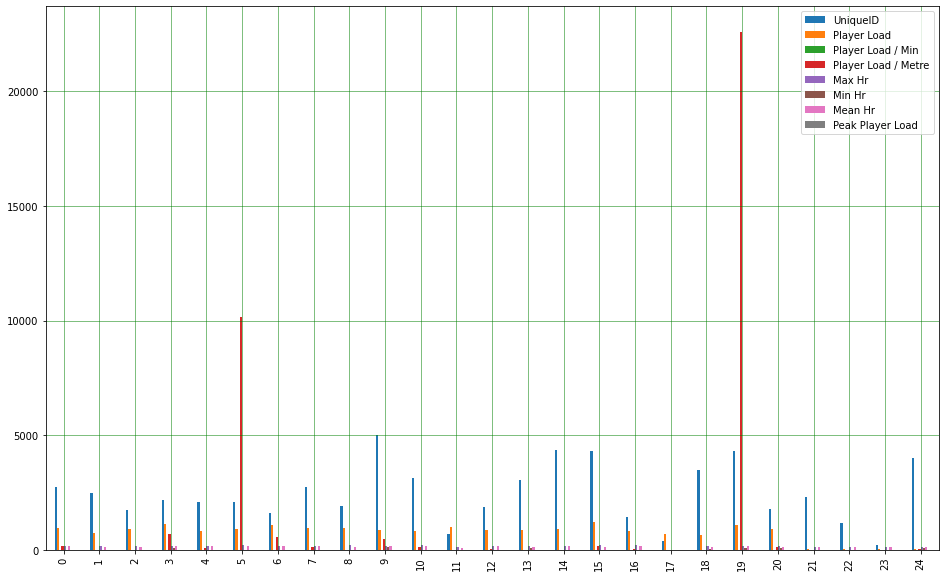

In [174]:
df2 = df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

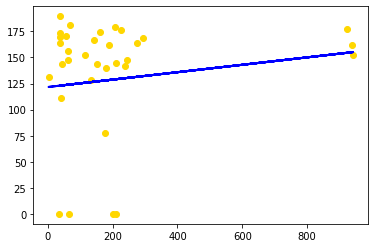

In [177]:
plt.scatter(X_test, y_test,  color='gold')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()


In [164]:
from sklearn.metrics import mean_squared_error

In [170]:
mean_squared_error(y_test, y_pred)

3007.816615719062